Bootcamp Report - GROUP05, Rennes School of Business, MSC International Finance 2020
Instructor: Dr. Amirhossein SADOGHI

Project n°8: Portfolio Optmation USING K-MEANS ALGORITHM

Group n°9:
Sara ELBAZ
Cyprian GENDRY
Kenza LARHILD


# Part 1: Definition of our data from the file "prices.csv"

In [1]:
from pylab import plot, show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [3]:
table = pd.read_csv('prices.csv', delimiter = ',', index_col = 'date')
prices = table.pivot(columns = 'symbol', values = 'close')
prices

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.770000,40.380001,30.572857,NaN,26.629999,26.129884,42.070000,37.090000,31.670000,...,25.379999,69.150002,35.330002,8.63,NaN,17.100000,25.226457,60.020000,13.330000,NaN
2010-01-05,22.145923,5.310000,40.139999,30.625713,NaN,26.440001,25.918773,42.330002,37.700001,31.620001,...,25.059999,69.419998,34.910000,8.64,NaN,17.230000,25.140187,61.919998,13.800000,NaN
2010-01-06,22.067240,5.090000,40.490002,30.138571,NaN,26.190001,26.062713,42.779999,37.619999,31.559999,...,24.889999,70.019997,35.139999,8.56,NaN,17.170000,24.960462,61.900002,15.000000,NaN
2010-01-07,22.038626,5.240000,40.480000,30.082857,NaN,25.770000,26.278623,42.740002,36.889999,31.309999,...,24.639999,69.800003,35.599998,8.60,NaN,16.700001,24.953272,63.320000,16.680000,NaN
2010-01-08,22.031474,5.140000,40.639999,30.282858,NaN,26.049999,26.412967,42.570000,36.689999,31.490000,...,25.000000,69.519997,35.599998,8.57,NaN,16.700001,24.960462,61.990002,16.410000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,46.200001,48.480000,170.889999,116.519997,62.340000,78.559998,38.419998,117.480003,105.019997,73.839996,...,60.560001,90.709999,59.240002,8.95,51.009998,38.660000,63.810001,102.320000,43.860001,53.779999
2016-12-27,46.509998,48.610001,171.839996,117.260002,62.500000,78.820000,38.599998,117.550003,104.980003,74.309998,...,61.240002,90.750000,59.070000,8.94,50.860001,38.919998,64.029999,103.139999,43.930000,53.720001
2016-12-28,45.720001,47.669998,170.419998,116.760002,62.270000,78.349998,38.220001,116.610001,103.769997,73.559998,...,60.630001,90.300003,58.150002,8.76,49.939999,38.730000,63.720001,103.059998,43.279999,53.439999


# Part 2: Definition of clusters and begin our K-means investigation

Text(0.5, 1.0, 'Elbow curve')

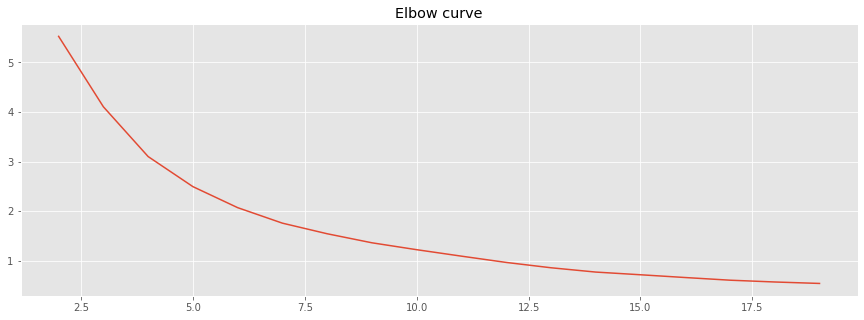

In [4]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = prices.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices.pct_change().std() * sqrt(252)

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

## We decided to build 7 groups because the elbow curve seems to "break" around this number. 

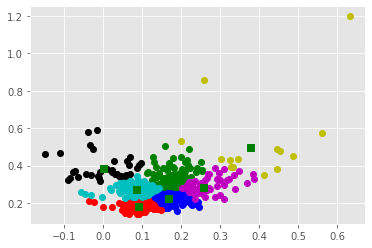

In [5]:
# computing K-Means with K = 7 (7 clusters)
centroids,_ = kmeans(data,7)

# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc',
     data[idx==6,0],data[idx==6,1],'ok',)
plot(centroids[:,0],centroids[:,1],'sg',markersize=7)
show()

In [6]:
#identify the outlier
print(returns.idxmax())
returns.head()

Returns       EVHC
Volatility    EVHC
dtype: object


,Returns,Volatility
symbol,,
A,0.146146,0.297808
AAL,0.444411,0.487552
AAP,0.242189,0.273269
AAPL,0.225074,0.262210
ABBV,0.182541,0.274614


In [7]:
#drop the relevant stock from our data
returns.drop('EVHC',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

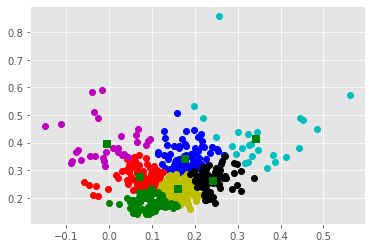

In [8]:
# computing K-Means with K = 7 (7 clusters)
centroids,_ = kmeans(data,7)

# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc',
     data[idx==6,0],data[idx==6,1],'ok',)
plot(centroids[:,0],centroids[:,1],'sg',markersize=7)
show()

Finally we registered our cluster in a list identified by the name of the ticker and the number of the respective cluster.

In [9]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)
    
cluster = pd.DataFrame(details).set_index(0)
# cluster.to_csv('clusterize_ticker')
cluster.columns = ['cluster']
len(cluster)

('A', 0)
('AAL', 5)
('AAP', 6)
('AAPL', 6)
('ABBV', 1)
('ABC', 1)
('ABT', 3)
('ACN', 1)
('ADBE', 1)
('ADI', 1)
('ADM', 2)
('ADP', 3)
('ADS', 6)
('ADSK', 0)
('AEE', 3)
('AEP', 3)
('AES', 2)
('AET', 6)
('AFL', 2)
('AGN', 6)
('AIG', 0)
('AIV', 1)
('AIZ', 1)
('AJG', 3)
('AKAM', 0)
('ALB', 0)
('ALK', 5)
('ALL', 1)
('ALLE', 3)
('ALXN', 5)
('AMAT', 1)
('AME', 1)
('AMG', 0)
('AMGN', 1)
('AMP', 0)
('AMT', 1)
('AMZN', 6)
('AN', 0)
('ANTM', 1)
('AON', 1)
('APA', 4)
('APC', 4)
('APD', 3)
('APH', 1)
('ARNC', 5)
('ATVI', 6)
('AVB', 1)
('AVGO', 5)
('AVY', 1)
('AWK', 1)
('AXP', 1)
('AYI', 5)
('AZO', 6)
('BA', 1)
('BAC', 0)
('BAX', 3)
('BBBY', 2)
('BBT', 1)
('BBY', 4)
('BCR', 1)
('BDX', 3)
('BEN', 2)
('BHI', 0)
('BIIB', 6)
('BK', 2)
('BLK', 2)
('BLL', 1)
('BMY', 1)
('BSX', 0)
('BWA', 0)
('BXP', 3)
('C', 0)
('CA', 3)
('CAG', 3)
('CAH', 1)
('CAT', 2)
('CB', 1)
('CBG', 0)
('CBS', 6)
('CCI', 1)
('CCL', 2)
('CELG', 6)
('CERN', 1)
('CF', 0)
('CFG', 6)
('CHD', 1)
('CHK', 4)
('CHRW', 2)
('CHTR', 6)
('CI', 6)
(

500

# Part 3: Simulation and optimization of a portfolio

In [10]:
import pandas as pd  
import numpy as np
import datetime
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
tickers = ['GOOG', 'MAS', 'REGN', 'IBM', 'AMZN', 'TRIP', 'FOX']
goog = pd.DataFrame(prices[tickers[0]])
mas = pd.DataFrame(prices[tickers[1]])
regn = pd.DataFrame(prices[tickers[2]])
ibm = pd.DataFrame(prices[tickers[3]])
amzn = pd.DataFrame(prices[tickers[4]])
trip = pd.DataFrame(prices[tickers[5]])
fox = pd.DataFrame(prices[tickers[6]])
df = pd.concat([goog,mas, regn, ibm, amzn, trip, fox], axis=1)
df

,GOOG,MAS,REGN,IBM,AMZN,TRIP,FOX
date,,,,,,,
2010-01-04,312.205308,12.557118,24.629999,132.449997,133.899994,NaN,14.408129
2010-01-05,310.830459,12.671353,25.100000,130.850006,134.690002,NaN,14.346289
2010-01-06,302.994813,12.803163,24.719999,130.000000,132.250000,NaN,14.558299
2010-01-07,295.941242,13.602812,24.570000,129.550003,130.000000,NaN,14.443460
2010-01-08,299.886470,13.690685,24.370001,130.850006,133.520004,NaN,14.505299
...,...,...,...,...,...,...,...
2016-12-23,789.909973,32.060001,381.779999,166.710007,760.590027,46.540001,27.700001
2016-12-27,791.549988,32.240002,385.950012,167.139999,771.400024,47.290001,27.840000
2016-12-28,785.049988,31.830000,378.750000,166.190002,772.130005,46.849998,27.660000


In [12]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [13]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0
results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

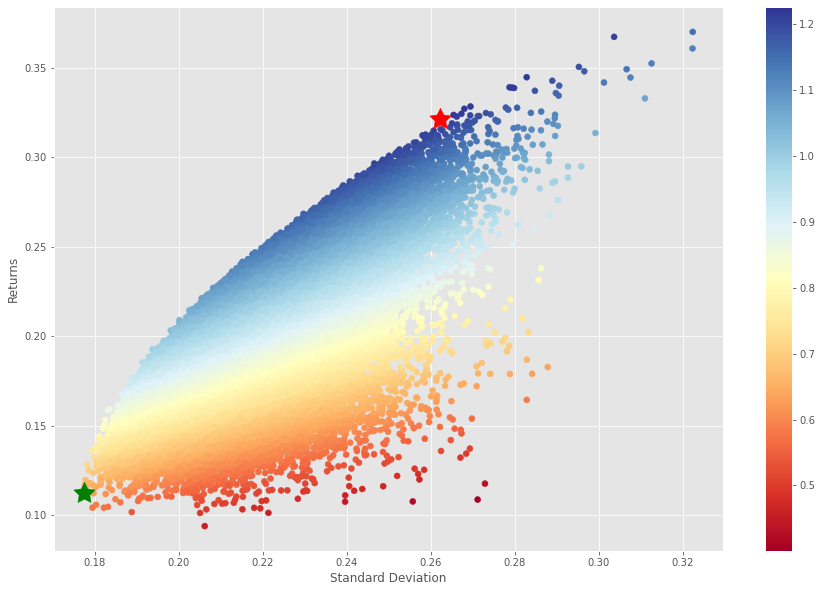

In [14]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [15]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,GOOG,MAS,REGN,IBM,AMZN,TRIP,FOX
8337,0.321301,0.262152,1.225628,0.197313,0.051622,0.353923,0.002087,0.334597,0.007875,0.052583


In [16]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,GOOG,MAS,REGN,IBM,AMZN,TRIP,FOX
40093,0.112421,0.177374,0.633808,0.302346,0.051461,0.015422,0.496848,0.029398,0.027557,0.076969


In [19]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

In [20]:
pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=tickers).T

,GOOG,MAS,REGN,IBM,AMZN,TRIP,FOX
0,0.09,0.0,0.46,0.0,0.45,0.0,0.0


In [21]:
def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    return portfolio_std
def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_variance = min_variance(mean_returns, cov)

In [22]:
pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=tickers).T

,GOOG,MAS,REGN,IBM,AMZN,TRIP,FOX
0,0.2,0.0,0.01,0.59,0.03,0.04,0.13


In [23]:
def calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var
def simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR'] + [ticker for ticker in tickers])
        
    return results_df

In [24]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0
days = 252
alpha = 0.05
results_frame = simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days)

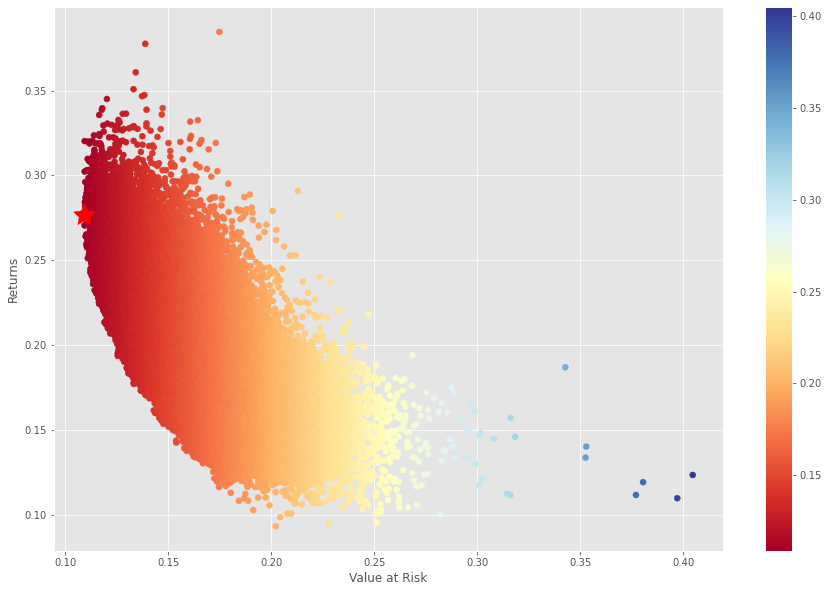

In [25]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [26]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,GOOG,MAS,REGN,IBM,AMZN,TRIP,FOX
67987,0.2769,0.234629,0.109029,0.219219,0.007562,0.283076,0.117073,0.290277,0.012047,0.070745


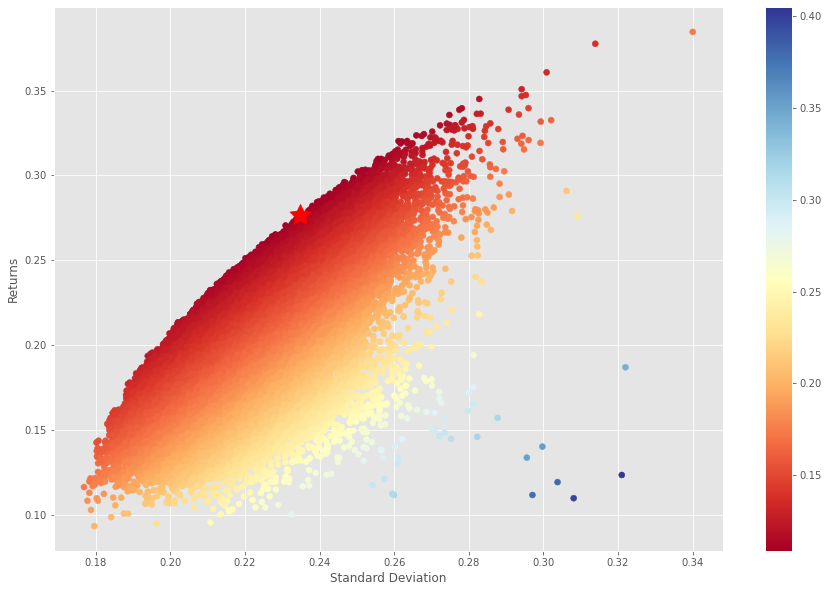

In [27]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[1],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [28]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def calc_portfolio_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_var
def min_VaR(mean_returns, cov, alpha, days):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha, days)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_VaR, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_VaR = min_VaR(mean_returns, cov, alpha, days)

In [29]:
pd.DataFrame([round(x,2) for x in min_port_VaR['x']],index=tickers).T

,GOOG,MAS,REGN,IBM,AMZN,TRIP,FOX
0,0.21,0.03,0.31,0.11,0.32,0.0,0.03


          GOOG       MAS      REGN       IBM      AMZN
GOOG  1.000000  0.958100  0.894942 -0.128389  0.940176
MAS   0.958100  1.000000  0.869078 -0.208210  0.944346
REGN  0.894942  0.869078  1.000000 -0.051274  0.799722
IBM  -0.128389 -0.208210 -0.051274  1.000000 -0.179952
AMZN  0.940176  0.944346  0.799722 -0.179952  1.000000


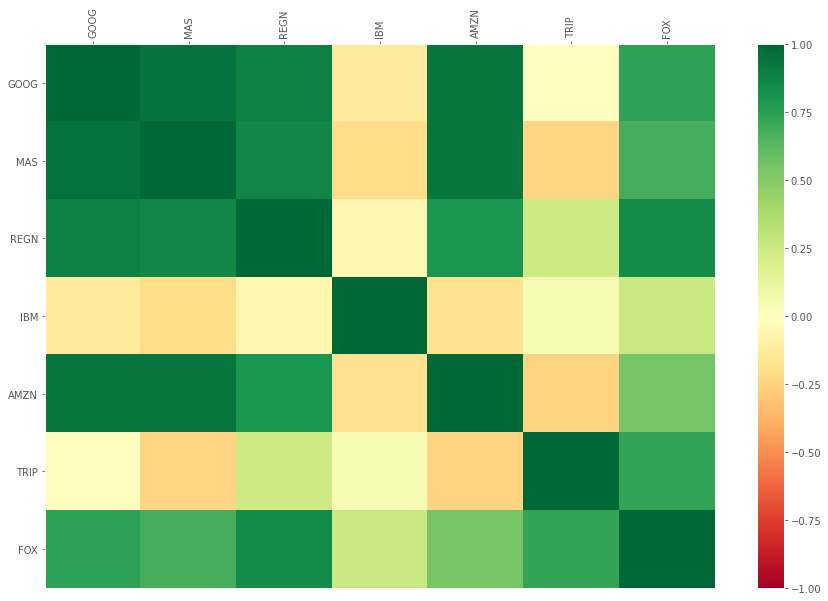

In [30]:
#Print correlation matrix
data_frame = df
df_corr = data_frame.corr()
print(df_corr.iloc[0:5,0:5])

data = df_corr.values
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

heat_map = ax.pcolor(data, cmap='RdYlGn')
fig.colorbar(heat_map)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
    
#     Show the labels of the table (with 500 stocks it's meaningless)
columns_labels = data_frame.columns                              #data_frame_correlation.columns
rows_labels = data_frame.columns                                #data_frame_correlation.index
ax.set_xticklabels(columns_labels)
ax.set_yticklabels(rows_labels)

plt.xticks(rotation=90)
heat_map.set_clim(-1, 1)
    

plt.show()

# PART 04 : EQUALLY WEIGHTED PORFOLIO - 1/N STRATEGY

In [31]:
table = pd.read_csv('prices.csv', delimiter = ',', index_col = 'date')
prices = table.pivot(columns = 'symbol', values = 'close')
prices

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.770000,40.380001,30.572857,NaN,26.629999,26.129884,42.070000,37.090000,31.670000,...,25.379999,69.150002,35.330002,8.63,NaN,17.100000,25.226457,60.020000,13.330000,NaN
2010-01-05,22.145923,5.310000,40.139999,30.625713,NaN,26.440001,25.918773,42.330002,37.700001,31.620001,...,25.059999,69.419998,34.910000,8.64,NaN,17.230000,25.140187,61.919998,13.800000,NaN
2010-01-06,22.067240,5.090000,40.490002,30.138571,NaN,26.190001,26.062713,42.779999,37.619999,31.559999,...,24.889999,70.019997,35.139999,8.56,NaN,17.170000,24.960462,61.900002,15.000000,NaN
2010-01-07,22.038626,5.240000,40.480000,30.082857,NaN,25.770000,26.278623,42.740002,36.889999,31.309999,...,24.639999,69.800003,35.599998,8.60,NaN,16.700001,24.953272,63.320000,16.680000,NaN
2010-01-08,22.031474,5.140000,40.639999,30.282858,NaN,26.049999,26.412967,42.570000,36.689999,31.490000,...,25.000000,69.519997,35.599998,8.57,NaN,16.700001,24.960462,61.990002,16.410000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,46.200001,48.480000,170.889999,116.519997,62.340000,78.559998,38.419998,117.480003,105.019997,73.839996,...,60.560001,90.709999,59.240002,8.95,51.009998,38.660000,63.810001,102.320000,43.860001,53.779999
2016-12-27,46.509998,48.610001,171.839996,117.260002,62.500000,78.820000,38.599998,117.550003,104.980003,74.309998,...,61.240002,90.750000,59.070000,8.94,50.860001,38.919998,64.029999,103.139999,43.930000,53.720001
2016-12-28,45.720001,47.669998,170.419998,116.760002,62.270000,78.349998,38.220001,116.610001,103.769997,73.559998,...,60.630001,90.300003,58.150002,8.76,49.939999,38.730000,63.720001,103.059998,43.279999,53.439999


In [32]:
tickers = ['GOOG', 'MAS', 'REGN', 'IBM', 'AMZN']
goog = pd.DataFrame(prices[tickers[0]])
mas = pd.DataFrame(prices[tickers[1]])
regn = pd.DataFrame(prices[tickers[2]])
ibm = pd.DataFrame(prices[tickers[3]])
amzn = pd.DataFrame(prices[tickers[4]])
df = pd.concat([goog,mas, regn, ibm, amzn], axis=1)
df

,GOOG,MAS,REGN,IBM,AMZN
date,,,,,
2010-01-04,312.205308,12.557118,24.629999,132.449997,133.899994
2010-01-05,310.830459,12.671353,25.100000,130.850006,134.690002
2010-01-06,302.994813,12.803163,24.719999,130.000000,132.250000
2010-01-07,295.941242,13.602812,24.570000,129.550003,130.000000
2010-01-08,299.886470,13.690685,24.370001,130.850006,133.520004
...,...,...,...,...,...
2016-12-23,789.909973,32.060001,381.779999,166.710007,760.590027
2016-12-27,791.549988,32.240002,385.950012,167.139999,771.400024
2016-12-28,785.049988,31.830000,378.750000,166.190002,772.130005


In [33]:
#Checking if any NaN values in the data
nullin_df = pd.DataFrame(df, columns=tickers)
print(nullin_df.isnull().sum())

GOOG    0
MAS     0
REGN    0
IBM     0
AMZN    0
dtype: int64


In [34]:
pip install pyportfolioopt

Note: you may need to restart the kernel to use updated packages.


 2 **Calculations**

In [35]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from matplotlib.ticker import FuncFormatter
#Annualized Return
mu = expected_returns.mean_historical_return(df)
#Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df)

In [36]:

#Max Sharpe Ratio - Tangent to the EF
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)

OrderedDict([('GOOG', 0.0), ('MAS', 0.0), ('REGN', 0.52693), ('IBM', 0.0), ('AMZN', 0.47307)])


In [37]:
ef.portfolio_performance(verbose=True, risk_free_rate = 0.27)
# 2year risk free rate - Treasury Yield

Expected annual return: 38.1%
Annual volatility: 31.9%
Sharpe Ratio: 0.35


(0.3809618588696801, 0.3191179372439964, 0.34771426460067345)

In [38]:
#Min Volatility Portfolio
ef1 = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
minvol=ef1.min_volatility()
minvol_pwt=ef1.clean_weights()
print(minvol_pwt)

OrderedDict([('GOOG', 0.24574), ('MAS', 0.0), ('REGN', 0.02688), ('IBM', 0.67636), ('AMZN', 0.05102)])


In [39]:
ef1.portfolio_performance(verbose=True, risk_free_rate = 0.27)


Expected annual return: 8.3%
Annual volatility: 17.7%
Sharpe Ratio: -1.06


(0.08313683360928875, 0.17697509230659347, -1.0558726878186202)

4. **Plotting the Efficient Frontier and Optimizing Portfolio Allocation**

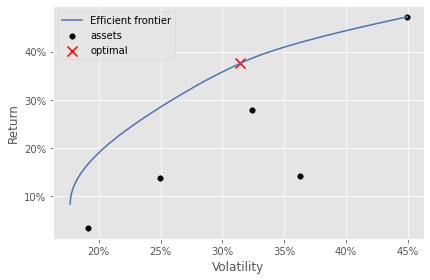

In [40]:
import pypfopt.plotting as pplt
from pypfopt.cla import CLA
from pypfopt import discrete_allocation
cl_obj = CLA(mu, Sigma)
ax = pplt.plot_efficient_frontier(cl_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [41]:


latest_prices = discrete_allocation.get_latest_prices(df)
# Allocate Portfolio Value in $ as required to show number of shares/stocks to buy, also bounds for shorting will affect allocation
#Min Volatility Portfolio Allocation $10000
allocation_minv, rem_minv = discrete_allocation.DiscreteAllocation(minvol_pwt, latest_prices, total_portfolio_value=10000).lp_portfolio() 
print(allocation_minv)
print("Leftover Fund value in$ after building minimum volatility portfolio is ${:.2f}".format(rem_minv))
print()

{'GOOG': 3, 'IBM': 41, 'AMZN': 1}
Leftover Fund value in$ after building minimum volatility portfolio is $129.08



In [42]:

#Max Sharpe Ratio Portfolio Allocation $10000
latest_prices1 = discrete_allocation.get_latest_prices(df)
allocation_shp, rem_shp = discrete_allocation.DiscreteAllocation(sharpe_pwt, latest_prices1, total_portfolio_value=1000).lp_portfolio() 
print(allocation_shp)
print("Leftover Fund value in$ after building Max Sharpe ratio portfolio is ${:.2f}".format(rem_shp))

#allocation using integer programming via PyPortfolioOpt User Guide
#Alex Putkov code used for guidance and reference in applying integer programming

{'REGN': 2}
Leftover Fund value in$ after building Max Sharpe ratio portfolio is $265.82
